## Installing the Library we need to test for all Regression Models

In [19]:
#!pip install pycaret

# Importing all other Necessary Libraries

In [26]:
from tqdm import tqdm
import math
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from math import sqrt 
import lightgbm as lgb
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import KFold, train_test_split
import requests
from io import StringIO 
%matplotlib inline
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

# Enabling Interactive Visual on Colab

In [27]:
#from pycaret.utils import enable_colab
#enable_colab()

# Importing our dataset

In [28]:
df = pd.read_excel('datasett_len.xlsx')
df.head()

,Temp,Size,Time,Moisture
0,338,1.5,0,1.0000
1,338,1.5,1,0.9096
2,338,1.5,2,0.8316
3,338,1.5,3,0.7648
4,338,1.5,4,0.7080


In [29]:
df.tail()

,Temp,Size,Time,Moisture
3847,368,4.5,316,0.04
3848,368,4.5,317,0.04
3849,368,4.5,318,0.04
3850,368,4.5,319,0.04
3851,368,4.5,320,0.04


In [30]:
df =df.rename(columns={'TEMP':'Temp', 'SIZE':'Size','TIME':'Time','MOISTURE':'Moisture'})

# Exploratory Data Analysis on the Data

In [31]:
df.shape

(3852, 4)

In [32]:
df.describe()

,Temp,Size,Time,Moisture
count,3852.000000,3852.000000,3852.000000,3852.000000
mean,353.000000,3.000000,160.000000,0.130723
std,11.181791,1.224904,92.676299,0.194920
min,338.000000,1.500000,0.000000,0.023200
25%,345.500000,1.500000,80.000000,0.040000
50%,353.000000,3.000000,160.000000,0.040000
75%,360.500000,4.500000,240.000000,0.104000
max,368.000000,4.500000,320.000000,1.000000


In [33]:
df.corr()

,Temp,Size,Time,Moisture
Temp,1.000000e+00,-8.731770e-15,-3.382851e-15,-0.130357
Size,-8.731770e-15,1.000000e+00,-9.681215e-16,0.279248
Time,-3.382851e-15,-9.681215e-16,1.000000e+00,-0.604875
Moisture,-1.303570e-01,2.792481e-01,-6.048753e-01,1.000000


In [34]:
df.Temp.nunique()

4

In [35]:
df.Temp.unique()

array([338, 348, 358, 368], dtype=int64)

In [36]:
df.Temp.value_counts()

338    963
348    963
358    963
368    963
Name: Temp, dtype: int64

In [37]:
df.Size.nunique()

3

In [38]:
df.Size.unique()

array([1.5, 3. , 4.5])

In [39]:
df['Size'].value_counts()

1.5    1284
4.5    1284
3.0    1284
Name: Size, dtype: int64

In [40]:
df['Time'].nunique()

321

In [41]:
df['Time'].value_counts()

0      12
1      12
117    12
115    12
113    12
       ..
212    12
210    12
208    12
206    12
319    12
Name: Time, Length: 321, dtype: int64

In [42]:
data = df.sample(frac=0.8, random_state=4097).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (3082, 4)
Unseen Data For Predictions (770, 4)


In [43]:
data.head()

,Temp,Size,Time,Moisture
0,348,3.0,304,0.04
1,358,1.5,163,0.04
2,368,1.5,186,0.04
3,338,3.0,253,0.04
4,348,1.5,212,0.04


In [44]:
data_unseen.head()

,Temp,Size,Time,Moisture
0,368,1.5,193,0.04
1,368,1.5,194,0.04
2,368,1.5,195,0.04
3,368,1.5,196,0.04
4,368,1.5,197,0.04


In [45]:
cat_cols = ['Temp', 'Size']

In [46]:
from pycaret.regression import *

## Importing Temperature and Size as categorical variables due to their sparse number of unique values

In [59]:
clf1 = setup(data=df, target = 'Moisture', session_id=4097, train_size = 0.8,  categorical_features=cat_cols)

,Description,Value
0,session_id,4097
1,Target,Moisture
2,Original Data,"(3852, 4)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3081, 8)"


In [60]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [61]:
#models().to_excel("Regressionn Models.xlsx")

## Comparing all different regressional models using different metrics

In [62]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0011,0.0000,0.0053,0.9990,0.0033,0.0028,0.2340
rf,Random Forest Regressor,0.0024,0.0001,0.0089,0.9976,0.0057,0.0087,0.2750
dt,Decision Tree Regressor,0.0032,0.0001,0.0098,0.9971,0.0064,0.0113,0.0190
lightgbm,Light Gradient Boosting Machine,0.0045,0.0002,0.0132,0.9950,0.0084,0.0255,0.0320
gbr,Gradient Boosting Regressor,0.0189,0.0009,0.0302,0.9746,0.0237,0.2218,0.0710
knn,K Neighbors Regressor,0.0335,0.0038,0.0612,0.8959,0.0474,0.3272,0.0270
ada,AdaBoost Regressor,0.0553,0.0046,0.0680,0.8718,0.0557,0.8748,0.0810
lr,Linear Regression,0.1033,0.0201,0.1414,0.4520,0.1000,1.5435,0.0100
ridge,Ridge Regression,0.1033,0.0201,0.1414,0.4520,0.1000,1.5433,0.0100
br,Bayesian Ridge,0.1032,0.0201,0.1414,0.4520,0.1000,1.5415,0.0160


## Creating Base Model

In [58]:
ext = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0377,0.0060,0.0775,0.6974,0.0610,0.4681
1,0.0748,0.0158,0.1259,0.7462,0.0916,0.2555
2,0.0528,0.0040,0.0633,0.9285,0.0520,0.2868
3,0.0104,0.0008,0.0278,0.9365,0.0226,0.0831
4,0.0143,0.0008,0.0279,0.9818,0.0215,0.0905
5,0.0305,0.0026,0.0515,0.9447,0.0367,0.1216
6,0.0053,0.0003,0.0172,0.9666,0.0132,0.0565
7,0.0845,0.0239,0.1547,-0.0172,0.1130,0.7621
8,0.0771,0.0188,0.1372,0.6909,0.0953,0.2853
9,0.0080,0.0005,0.0218,0.9496,0.0189,0.1338


In [121]:
gbr = create_model('gbr')
tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0951,0.0124,0.1112,0.8512,0.0873,0.8895
1,0.0778,0.0101,0.1006,0.8918,0.0759,0.6301
2,0.1013,0.0140,0.1185,0.8101,0.0884,0.3213
3,0.1013,0.0146,0.1207,0.7930,0.0876,0.8921
4,0.0903,0.0174,0.1318,0.8013,0.0938,0.3638
5,0.0692,0.0054,0.0736,0.9329,0.0576,0.6296
6,0.0876,0.0157,0.1252,0.7783,0.0825,0.5936
7,0.0723,0.0082,0.0904,0.8950,0.0762,0.7249
8,0.1028,0.0179,0.1338,0.8073,0.0960,0.6855
9,0.1046,0.0188,0.1372,0.7519,0.0990,1.1889


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4097, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Picking the best 2 models which should be top 2

In [73]:
top2 = compare_models(n_select=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0027,0.0001,0.0084,0.9986,0.0051,0.0082,0.2050
rf,Random Forest Regressor,0.0060,0.0002,0.0141,0.9964,0.0091,0.0229,0.3460
dt,Decision Tree Regressor,0.0080,0.0003,0.0163,0.9956,0.0106,0.0292,0.0150
lightgbm,Light Gradient Boosting Machine,0.0103,0.0005,0.0211,0.9923,0.0137,0.0481,0.0470
gbr,Gradient Boosting Regressor,0.0243,0.0012,0.0343,0.9815,0.0248,0.1482,0.0710
ada,AdaBoost Regressor,0.0827,0.0091,0.0951,0.8594,0.0735,0.7740,0.0620
knn,K Neighbors Regressor,0.0748,0.0098,0.0987,0.8488,0.0768,0.6493,0.0220
ridge,Ridge Regression,0.1166,0.0225,0.1494,0.6551,0.1009,0.9662,0.0140
lr,Linear Regression,0.1165,0.0225,0.1494,0.6550,0.1009,0.9646,0.0150
br,Bayesian Ridge,0.1166,0.0225,0.1494,0.6550,0.1009,0.9668,0.0160


In [27]:
type(compare_models)

function

## Blending the top 2 models for a better performance

In [28]:
blender = blend_models(top2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0029,0.0000,0.0059,0.9995,0.0043,0.0142
1,0.0037,0.0001,0.0093,0.9986,0.0057,0.0130
2,0.0050,0.0001,0.0111,0.9985,0.0067,0.0167
3,0.0048,0.0002,0.0133,0.9964,0.0093,0.0166
4,0.0039,0.0001,0.0105,0.9983,0.0065,0.0127
5,0.0035,0.0001,0.0090,0.9987,0.0066,0.0209
6,0.0062,0.0005,0.0215,0.9926,0.0118,0.0154
7,0.0045,0.0001,0.0098,0.9987,0.0060,0.0145
8,0.0035,0.0001,0.0080,0.9990,0.0051,0.0102
9,0.0027,0.0000,0.0059,0.9995,0.0036,0.0094


## Stacking the top 2 models for better performance

In [74]:
stack = stack_models(top2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0025,0.0000,0.0048,0.9997,0.0031,0.0132
1,0.0030,0.0000,0.0069,0.9993,0.0044,0.0170
2,0.0043,0.0001,0.0114,0.9984,0.0066,0.0167
3,0.0037,0.0001,0.0102,0.9979,0.0067,0.0161
4,0.0025,0.0000,0.0066,0.9993,0.0040,0.0115
5,0.0023,0.0000,0.0048,0.9996,0.0036,0.0183
6,0.0046,0.0003,0.0182,0.9947,0.0096,0.0151
7,0.0039,0.0001,0.0081,0.9991,0.0049,0.0198
8,0.0027,0.0001,0.0071,0.9992,0.0045,0.0139
9,0.0020,0.0000,0.0033,0.9998,0.0021,0.0110


## Stacking the top 2 models with an extra trees meta model for better performance

In [55]:
stack1 = stack_models(top2, meta_model=ext)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1462,0.0273,0.1654,0.6716,0.1191,0.6750
1,0.0202,0.0006,0.0237,0.9002,0.0214,0.2752
2,0.1128,0.0163,0.1277,0.6891,0.0910,0.2692
3,0.0266,0.0009,0.0304,0.5614,0.0261,0.2139
4,0.0228,0.0015,0.0382,0.9736,0.0278,0.2202
5,0.0574,0.0071,0.0840,0.8838,0.0661,0.2561
6,0.0669,0.0060,0.0776,0.8700,0.0562,0.2263
7,0.0307,0.0013,0.0364,0.9302,0.0316,0.4095
8,0.1201,0.0262,0.1619,0.6417,0.1187,0.7720
9,0.1898,0.0470,0.2168,0.1103,0.1598,0.5249


## Stacking the top 2 models with a random forest meta model for better performance

In [75]:
raf = create_model('rf')
stack2 = stack_models(top2, meta_model=raf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0027,0.0000,0.0050,0.9996,0.0030,0.0118
1,0.0027,0.0001,0.0074,0.9991,0.0046,0.0095
2,0.0040,0.0001,0.0118,0.9982,0.0068,0.0116
3,0.0040,0.0001,0.0118,0.9971,0.0078,0.0107
4,0.0026,0.0000,0.0064,0.9994,0.0040,0.0088
5,0.0026,0.0000,0.0062,0.9994,0.0044,0.0145
6,0.0047,0.0003,0.0178,0.9949,0.0095,0.0108
7,0.0035,0.0001,0.0088,0.9990,0.0051,0.0094
8,0.0034,0.0001,0.0082,0.9990,0.0052,0.0093
9,0.0023,0.0000,0.0044,0.9997,0.0028,0.0071


## Tuning the extre trees regression model for better performance

In [56]:
#ext_tuned = tune_model(ext)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1507,0.0302,0.1737,0.6376,0.1196,0.4626
1,0.0233,0.0008,0.0278,0.8629,0.0260,0.4398
2,0.0881,0.0088,0.0936,0.8329,0.0684,0.2288
3,0.0231,0.0007,0.0259,0.6806,0.0238,0.2217
4,0.0354,0.0019,0.0436,0.9655,0.0332,0.4911
5,0.0267,0.0010,0.0317,0.9834,0.0235,0.2069
6,0.0513,0.0041,0.0642,0.9110,0.0455,0.1589
7,0.0503,0.0037,0.0606,0.8071,0.0477,0.6939
8,0.1541,0.0344,0.1855,0.5297,0.1354,1.1707
9,0.1032,0.0154,0.1243,0.7076,0.0861,0.2909


## Tuning the random forest regression model for better performance

In [33]:
raf_tuned = tune_model(raf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0333,0.0023,0.0475,0.9671,0.0345,0.1907
1,0.0465,0.0048,0.0696,0.9242,0.0498,0.2769
2,0.0381,0.0034,0.0579,0.9581,0.0403,0.2070
3,0.0460,0.0046,0.0680,0.9052,0.0522,0.2643
4,0.0365,0.0031,0.0553,0.9542,0.0395,0.2241
5,0.0388,0.0036,0.0603,0.9412,0.0470,0.2543
6,0.0426,0.0038,0.0617,0.9390,0.0464,0.2563
7,0.0424,0.0036,0.0604,0.9511,0.0477,0.2381
8,0.0448,0.0048,0.0693,0.9274,0.0522,0.2545
9,0.0406,0.0032,0.0566,0.9501,0.0416,0.1966


# VARIABLE IMPORTANCE PLOT FOR BOTH TOP 2 MODELS

### Feature Importance plot for Extra Trees Regression model

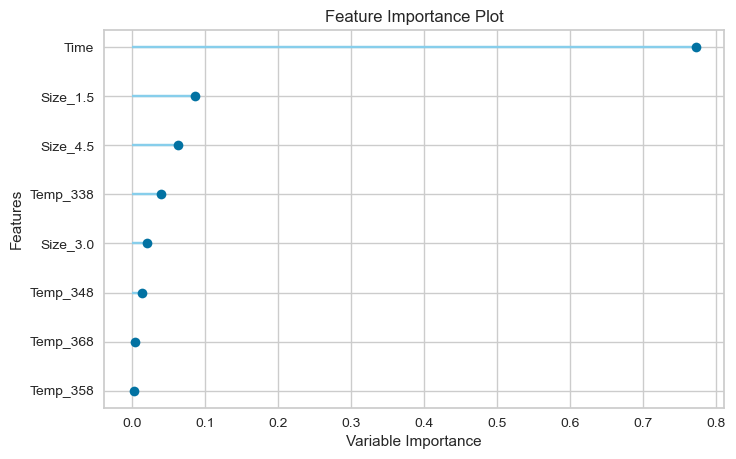

In [52]:
plot_model(ext, plot='feature')

### Feature Importance plot for Random Forest Regression model

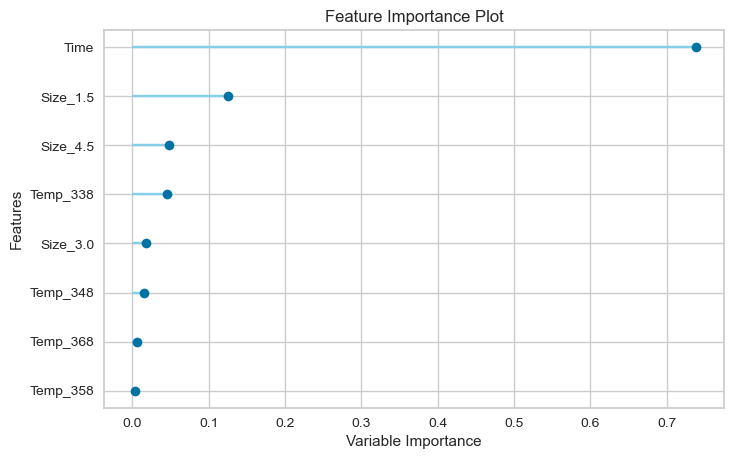

In [77]:
plot_model(raf, plot='feature')

# ERROR PLOT FOR BOTH TOP 2 MODELS

### Error Plot for the Extra Trees Regressor model

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


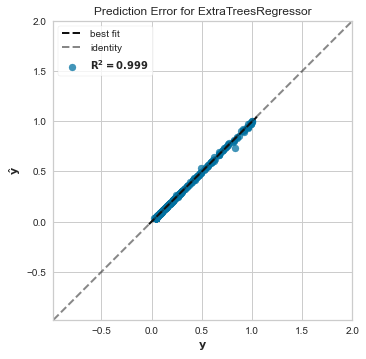

In [53]:
plot_model(ext, plot='error')

### Error Plot for the Random Forest Regressor model

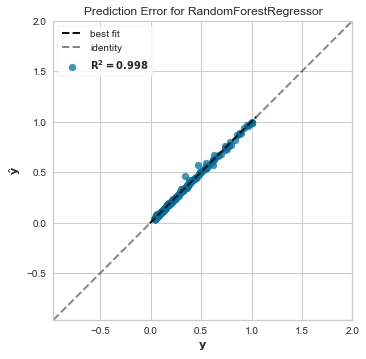

In [79]:
plot_model(raf, plot='error')

## PLOTS FOR TOP 2 MODELS

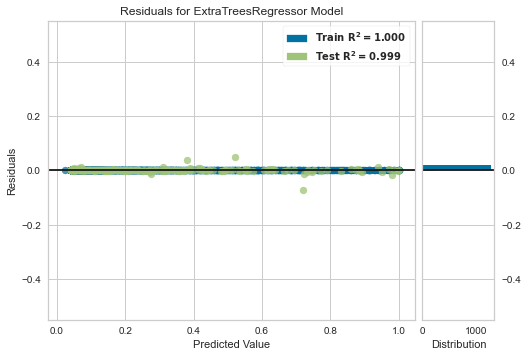

In [38]:
plot_model(ext)

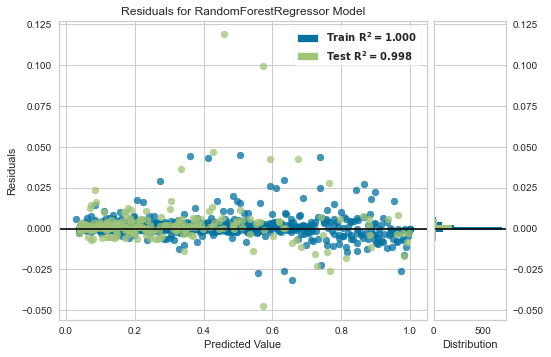

In [39]:
plot_model(raf)

## Predicting with the extra trees model

In [63]:
ext = create_model('et')
pred = predict_model(ext)
pred

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0011,0.0000,0.0051,0.9992,0.0033,0.0027
1,0.0005,0.0000,0.0022,0.9998,0.0013,0.0017
2,0.0007,0.0000,0.0029,0.9997,0.0020,0.0034
3,0.0008,0.0000,0.0043,0.9995,0.0029,0.0025
4,0.0015,0.0000,0.0060,0.9992,0.0037,0.0039
5,0.0028,0.0002,0.0153,0.9946,0.0095,0.0051
6,0.0005,0.0000,0.0024,0.9998,0.0015,0.0017
7,0.0007,0.0000,0.0030,0.9997,0.0018,0.0022
8,0.0011,0.0000,0.0050,0.9994,0.0027,0.0022
9,0.0011,0.0000,0.0066,0.9991,0.0040,0.0024


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0009,0.0000,0.0048,0.9994,0.0029,0.0031


,Time,Temp_338,Temp_348,Temp_358,Temp_368,Size_1.5,Size_3.0,Size_4.5,Moisture,Label
0,304.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0400,0.040000
1,163.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0400,0.040000
2,186.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0400,0.040000
3,253.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0400,0.040000
4,212.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0400,0.040000
...,...,...,...,...,...,...,...,...,...,...
766,296.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0400,0.040000
767,31.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.1992,0.200884
768,92.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0400,0.040000
769,90.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.2150,0.215495


In [41]:
type(pred)

pandas.core.frame.DataFrame

In [42]:
pred.to_excel("pyCaret Analysis.xlsx")

## Predicting with the stacked model 

In [43]:
predict_model(stack)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.0029,0.0000,0.0063,0.9993,0.0042,0.0212


,Time,Temp_338,Temp_348,Temp_358,Temp_368,Size_1.5,Size_3.0,Size_4.5,Moisture,Label
0,152.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0680,0.066636
1,64.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.2828,0.277215
2,58.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0808,0.077802
3,222.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0800,0.080573
4,261.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0595,0.061219
...,...,...,...,...,...,...,...,...,...,...
315,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.8985,0.897939
316,179.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0715,0.070801
317,54.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.3288,0.328091
318,295.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0500,0.052924


In [53]:
mlp = create_model('mlp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1669,0.0433,0.2081,0.4801,0.1484,0.6004
1,0.1023,0.0186,0.1362,-2.2903,0.0766,1.6664
2,0.1048,0.0155,0.1247,0.7037,0.0875,0.2755
3,0.1136,0.0167,0.1291,-6.9357,0.0819,0.9980
4,0.5619,0.5279,0.7266,-8.5546,0.4428,10.6861
5,0.1063,0.0138,0.1174,0.7732,0.0965,1.0720
6,0.0671,0.0071,0.0844,0.8460,0.0666,0.3084
7,0.1402,0.0325,0.1803,-0.7096,0.1349,1.7560
8,0.1315,0.0223,0.1493,0.6952,0.1159,1.4179
9,0.1170,0.0181,0.1345,0.6574,0.1035,0.5501


In [54]:
tune_mlp = tune_model(mlp)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1463,0.0320,0.1790,0.6153,0.1206,0.2997
1,0.0504,0.0039,0.0624,0.3105,0.0542,0.5101
2,0.0518,0.0032,0.0566,0.9390,0.0419,0.1455
3,0.0317,0.0011,0.0328,0.4896,0.0291,0.2598
4,0.0575,0.0067,0.0820,0.8782,0.0650,0.5821
5,0.0534,0.0032,0.0562,0.9480,0.0454,0.5243
6,0.0719,0.0073,0.0852,0.8431,0.0583,0.2026
7,0.0563,0.0069,0.0828,0.6392,0.0631,0.6270
8,0.1176,0.0157,0.1252,0.7859,0.1008,1.2177
9,0.0325,0.0016,0.0397,0.9702,0.0294,0.1448


## Finalizing the extra trees model before deployment

In [64]:
final_ext = finalize_model(ext)

In [66]:
data_un = pd.read_excel('testdat.xlsx')

## Using the extra trees model to predict unseen data

In [67]:
unseen = predict_model(ext, data=data_un)
uns = unseen.head(25)
uns

,Temp,Size,Time,Label
0,368,4.5,1,0.979108
1,368,4.5,2,0.970858
2,368,4.5,3,0.944386
3,368,4.5,4,0.929200
4,368,4.5,5,0.911250
5,368,4.5,6,0.893200
6,368,4.5,7,0.875050
7,368,4.5,8,0.856800
8,368,4.5,9,0.838450
9,368,4.5,10,0.820000


KeyError: 'Moisture'

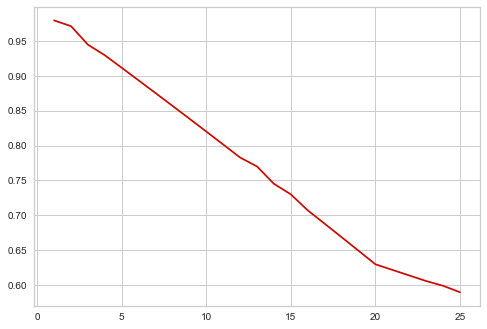

In [68]:
plt.plot(uns['Time'],uns['Label'],'-r',label='Predicted')
plt.plot(uns['Time'],uns['Moisture'],'b--o', label='Actual')
plt.xlabel('Time')
plt.ylabel('Moisture')
plt.title('Predicted vs Actual')
plt.legend(loc='upper right')
plt.show

In [84]:
from pycaret.utils import check_metric
check_metric(unseen.Moisture, unseen.Label, 'R2')

AttributeError: 'DataFrame' object has no attribute 'Moisture'

## Saving Model for future use

In [37]:
save_model(final_ext,'Final ExtraTreesReg Model 24Aug2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Temp', 'Size'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Moisture',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                   

In [71]:
unseen.to_excel('dataa.xlsx')